In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import warnings

# Filtering out warnings
warnings.filterwarnings("ignore")

# Setting matplotlib to inline mode
%matplotlib inline


### Using Pre-Processed Data


In [ ]:
# Import Cleaned Data specifically for Google Colab

import google.colab.drive as drive
drive.mount('/G', force_remount=True) #maha
#drive.mount('/content/drive', force_remount=True) #eunsung

# set directory; add CSV as shortcuts to your Google drive
data_dir = '/G/MyDrive/AML_Group_Project'
df = pd.read_csv(f'{data_dir}/cleaned_data.csv')

Mounted at /G


In [ ]:
# View Cleaned Data
df.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,1,1,13,460,3,4,3,1,5,3,...,5,5,25,18,0,0,0,1,0,1
1,1,0,25,235,3,2,3,3,1,3,...,4,1,1,6,0,1,0,0,1,0
2,0,1,26,1142,2,2,2,2,5,5,...,4,5,0,0,1,1,0,0,1,0
3,0,1,25,562,2,5,5,5,2,2,...,4,2,11,9,0,1,0,0,1,0
4,1,1,61,214,3,3,3,3,4,5,...,3,3,0,0,1,1,0,0,1,0


In [ ]:
# View Columns in Cleaned Data
list(df.columns)

['Gender',
 'Customer Type',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction',
 'Business',
 'Eco',
 'Eco Plus',
 'Business travel',
 'Personal Travel']

In [ ]:
# Define X, y for Cleaned Data
# using top 10 correlated predictors from EDA

var = ['Online boarding', 'Inflight wifi service', 'Business travel', 'Personal Travel', 'Inflight entertainment', 'Customer Type', 'Checkin service', 'Flight Distance', 'Age', 'Business'  ]
X=df[var]
y = df['satisfaction']

In [ ]:
# Splitting Cleaned Data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Optimal number of CV folds: 2
Best scores for each number of folds: {2: 0.8611410532799507, 3: 0.8593060260753514, 4: 0.8595883379529823, 5: 0.8597680247498012}


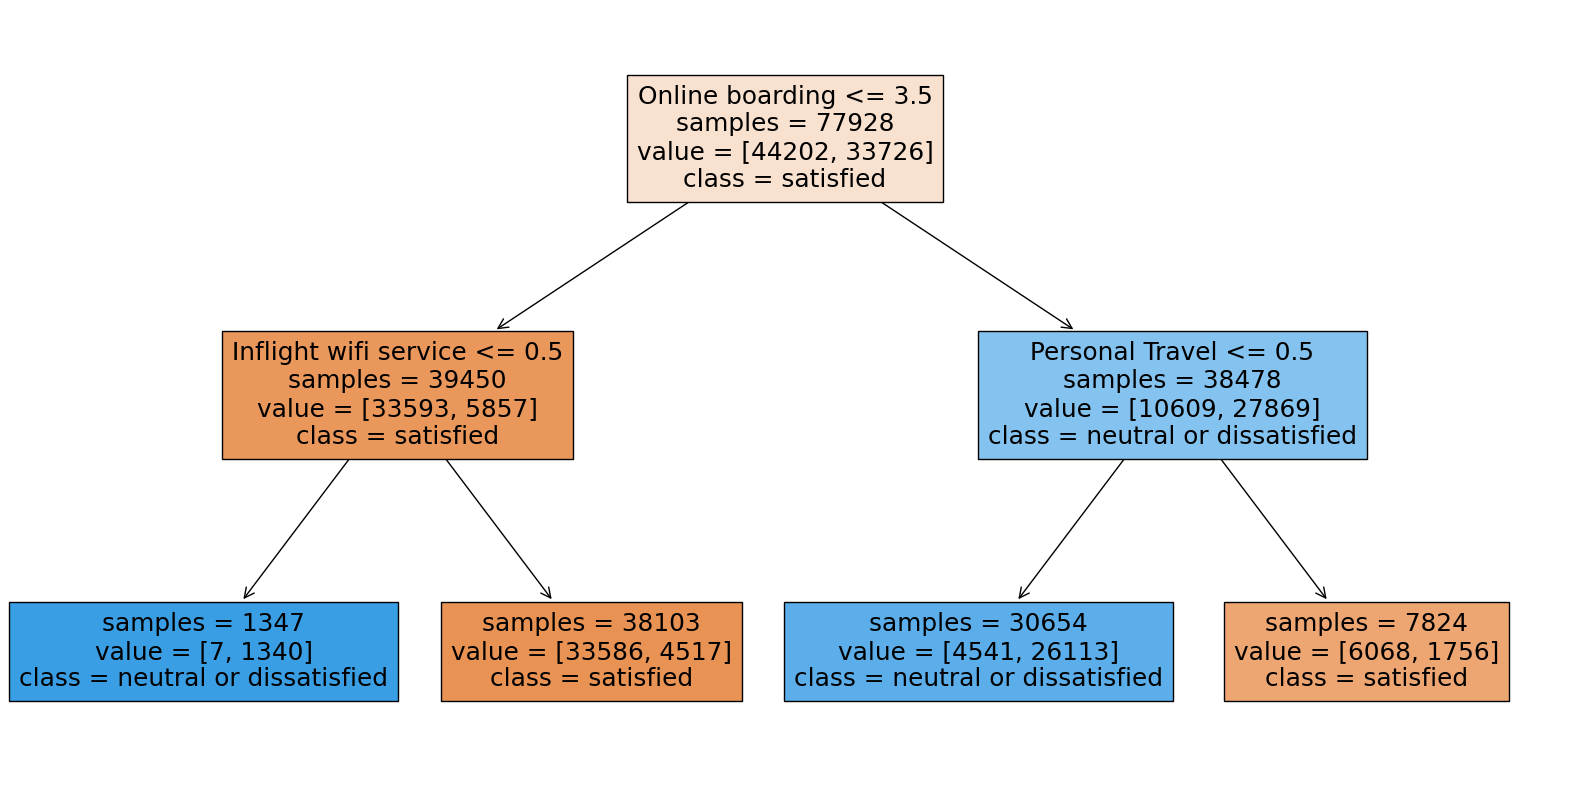

In [ ]:
# Generate Decision Tree for Cleaned Data

# Define the model
opt_tree = DecisionTreeClassifier(random_state=0)

# Define the grid of parameters to search
dt_params = {
    'max_depth': range(1, 5),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(1, 5)
}

# Define the range of CV folds to test
cv_folds_range = range(2, 6)  # From 2 to 5 folds

# Dictionary to store the best score for each CV
best_scores = {}

for folds in cv_folds_range:
    # Set up GridSearchCV with the current number of folds
    grid_tree = GridSearchCV(opt_tree, dt_params, cv=folds)
    # Fit the model
    grid_tree.fit(X_train, y_train)
    # Store the best score
    best_scores[folds] = grid_tree.best_score_

# Find the number of folds with the highest score
optimal_folds = max(best_scores, key=best_scores.get)

print(f"Optimal number of CV folds: {optimal_folds}")
print("Best scores for each number of folds:", best_scores)

# Get the best model from GridSearchCV
best_model = grid_tree.best_estimator_

# Plot the Cleaned Data Decision Tree using the best model
plt.figure(figsize=(20, 10))

# Plot the best model's decision tree
plot_tree(best_model, feature_names=var, class_names=['satisfied', 'neutral or dissatisfied'], filled=True, impurity=False)
plt.show()


In [ ]:
# Best Parameters for DT on Cleaned Data

# Chosen degree: this is the ...?
print("best params:",grid_tree.best_params_)

# The performance is chosen based on ...? - mean validation performance, asking for the R^2
print("best_score:",grid_tree.best_score_)


# Check best_estimator_
print(grid_tree.best_estimator_)


best params: {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
best_score: 0.8597680247498012
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=0)


Accuracy: 0.86
Precision: 0.85
Recall: 0.81
F1-score: 0.83
Specificity: 0.89


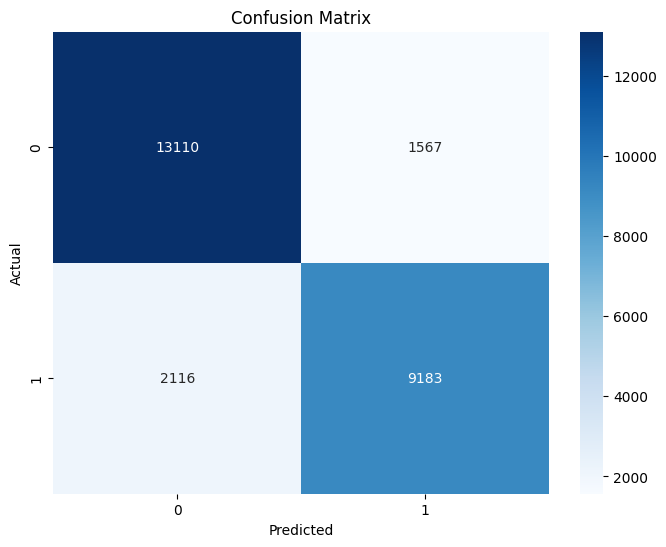


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14677
           1       0.85      0.81      0.83     11299

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.85     25976
weighted avg       0.86      0.86      0.86     25976



In [ ]:
# Cleaned Data Performance Metrics

# Get the best model from GridSearchCV
best_model = grid_tree.best_estimator_

# Predict the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity (True Negative Rate)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# Another mode of visualizing

print(tree.export_text(grid_tree.best_estimator_))

|--- feature_0 <= 3.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  3.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0



### Using Raw Data

In [ ]:
raw_data = pd.read_csv(f'{data_dir}/raw_data_unprocessed.csv')


In [ ]:
raw_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus,Business travel,Personal Travel
0,0,70172,1,1,13,460,3,4,3,1,...,5,5,25,18.0,0,0,0,1,0,1
1,1,5047,1,0,25,235,3,2,3,3,...,4,1,1,6.0,0,1,0,0,1,0
2,2,110028,0,1,26,1142,2,2,2,2,...,4,5,0,0.0,1,1,0,0,1,0
3,3,24026,0,1,25,562,2,5,5,5,...,4,2,11,9.0,0,1,0,0,1,0
4,4,119299,1,1,61,214,3,3,3,3,...,3,3,0,0.0,1,1,0,0,1,0


In [ ]:
raw_var = list(raw_data.columns)
print(raw_var)

['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', 'Business', 'Eco', 'Eco Plus', 'Business travel', 'Personal Travel']


In [ ]:
# Define X and y

raw_X = raw_data[raw_var]
raw_y = raw_data['satisfaction']
print (raw_X)
print(raw_y)

        Unnamed: 0      id  Gender  Customer Type  Age  Flight Distance  \
0                0   70172       1              1   13              460   
1                1    5047       1              0   25              235   
2                2  110028       0              1   26             1142   
3                3   24026       0              1   25              562   
4                4  119299       1              1   61              214   
...            ...     ...     ...            ...  ...              ...   
103899      103899   94171       0              0   23              192   
103900      103900   73097       1              1   49             2347   
103901      103901   68825       1              0   30             1995   
103902      103902   54173       0              0   22             1000   
103903      103903   62567       1              1   27             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3  

In [ ]:
# Splitting Data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_X, raw_y, random_state=42)

In [ ]:
# Handling NaN values in Raw Data (via imputation)
# Otherwise the model wouldnt run

# Initialize the imputer to handle missing values (NaN)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on the training data
imputer.fit(X_train_raw)

# Impute missing values in both training and testing sets
X_train_imputed = imputer.transform(X_train_raw)
X_test_imputed = imputer.transform(X_test_raw)



Optimal number of CV folds: 2
Best scores for each number of folds: {2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
best params: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}


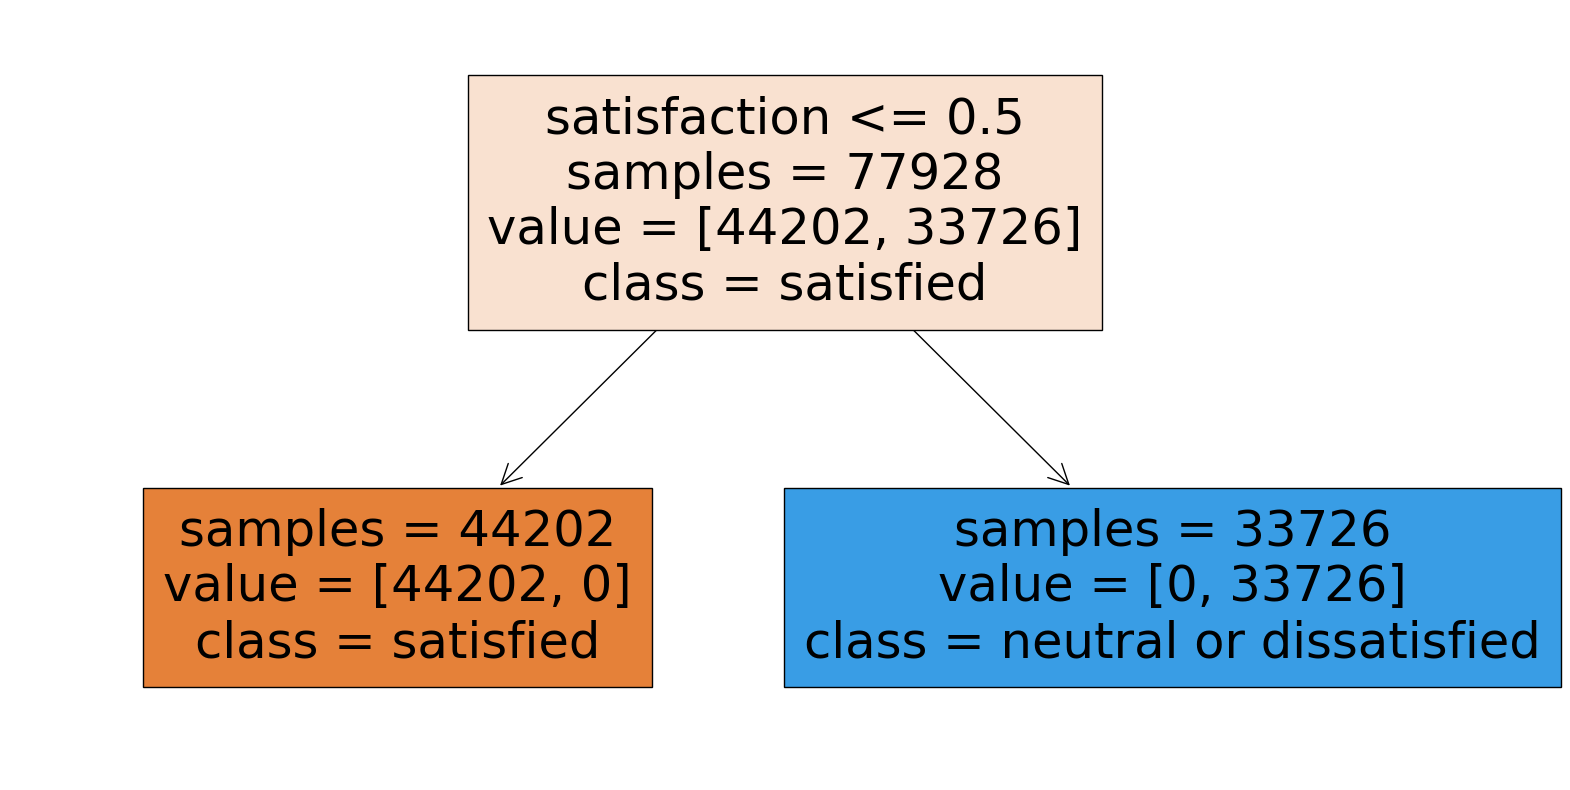

In [ ]:
# Using Multiple CVs

# Define the model
opt_tree_raw = DecisionTreeClassifier(random_state=0)

# Define the grid of parameters to search
dt_params_raw = {
    'max_depth': range(1, 5),
    'min_samples_split': range(1,5),
    'max_leaf_nodes': range(1, 5)
}

# Define the range of CV folds to test
cv_folds_range_raw = range(2,6)  # From 2 to 5 folds

# Dictionary to store the best score for each CV
best_scores_raw = {}

for folds in cv_folds_range_raw:
    # Set up GridSearchCV with the current number of folds
    grid_tree_raw = GridSearchCV(opt_tree_raw, dt_params_raw, cv=folds)
    # Fit the model
    grid_tree_raw.fit(X_train_imputed, y_train)
    # Store the best score
    best_scores_raw[folds] = grid_tree_raw.best_score_

# Find the number of folds with the highest score
optimal_folds_raw = max(best_scores_raw, key=best_scores_raw.get)

print(f"Optimal number of CV folds: {optimal_folds_raw}")
print("Best scores for each number of folds:", best_scores_raw) # the result of 1.0 indicates model overfits

# Get the best model from GridSearchCV
best_model_raw = grid_tree_raw.best_estimator_

print("best params:",grid_tree_raw.best_params_)

# Plot the Raw Data Decision Tree using the best model
plt.figure(figsize=(20, 10))

# Plot the best model's decision tree
plot_tree(best_model_raw, feature_names=raw_var, class_names=['satisfied', 'neutral or dissatisfied'], filled=True, impurity=False)
plt.show()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Specificity: 0.89


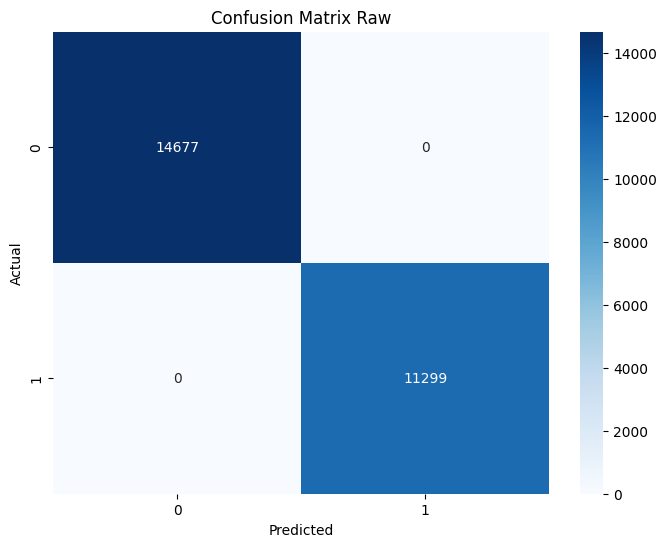


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14677
           1       1.00      1.00      1.00     11299

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976



In [ ]:
# Metrics for Raw Decision Tree Performance

# Get the best model from GridSearchCV
best_model_raw = grid_tree_raw.best_estimator_

# Predict the test data
y_pred_raw = best_model_raw.predict(X_test_imputed)

# Calculate accuracy, precision, recall, F1-score
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
precision_raw = precision_score(y_test_raw, y_pred_raw)
recall_raw = recall_score(y_test_raw, y_pred_raw)
f1_raw = f1_score(y_test_raw, y_pred_raw)

# Calculate specificity (True Negative Rate)
conf_matrix_raw = confusion_matrix(y_test_raw, y_pred_raw)
tn_raw, fp_raw, fn_raw, tp_raw = conf_matrix.ravel()
specificity_raw = tn_raw / (tn_raw + fp_raw)

# Display evaluation metrics
print(f"Accuracy: {accuracy_raw:.2f}")
print(f"Precision: {precision_raw:.2f}")
print(f"Recall: {recall_raw:.2f}")
print(f"F1-score: {f1_raw:.2f}")
print(f"Specificity: {specificity_raw:.2f}")

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_raw, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Raw")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_raw, y_pred_raw))

In [ ]:
# Another Mode of Visualizing Raw Data Tree

print(tree.export_text(grid_tree_raw.best_estimator_)) # inside bracket, can be dt_3, dt_full, etc.

|--- feature_22 <= 0.50
|   |--- class: 0
|--- feature_22 >  0.50
|   |--- class: 1

